In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 12
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((470, 12, 1), (470,))

In [8]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Bering_model_LT12/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
41/48 [========================>.....] - ETA: 0s - loss: 0.1648 - root_mean_squared_error: 0.4059

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 6s 83ms/step - loss: 0.1586 - root_mean_squared_error: 0.3982 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2672
Epoch 2/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0996 - root_mean_squared_error: 0.3157

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 3s 61ms/step - loss: 0.0935 - root_mean_squared_error: 0.3059 - val_loss: 0.0598 - val_root_mean_squared_error: 0.2445
Epoch 3/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0718 - root_mean_squared_error: 0.2680

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0721 - root_mean_squared_error: 0.2685 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2230
Epoch 4/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0571 - root_mean_squared_error: 0.2390

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 4s 85ms/step - loss: 0.0580 - root_mean_squared_error: 0.2408 - val_loss: 0.0432 - val_root_mean_squared_error: 0.2079
Epoch 5/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0537 - root_mean_squared_error: 0.2316

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 3s 65ms/step - loss: 0.0529 - root_mean_squared_error: 0.2301 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1973
Epoch 6/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0409 - root_mean_squared_error: 0.2023

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 3s 66ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1911
Epoch 7/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0294 - root_mean_squared_error: 0.1716

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 4s 89ms/step - loss: 0.0295 - root_mean_squared_error: 0.1718 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1864
Epoch 8/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0305 - root_mean_squared_error: 0.1746

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 4s 75ms/step - loss: 0.0291 - root_mean_squared_error: 0.1705 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1840
Epoch 9/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0236 - root_mean_squared_error: 0.1537

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 3s 65ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1811
Epoch 10/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0215 - root_mean_squared_error: 0.1468

INFO:tensorflow:Assets written to: Bering_model_LT12\assets


INFO:tensorflow:Assets written to: Bering_model_LT12\assets


48/48 [==============================] - 4s 86ms/step - loss: 0.0218 - root_mean_squared_error: 0.1478 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1763
Epoch 11/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1831
Epoch 12/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0213 - root_mean_squared_error: 0.1461 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1781
Epoch 13/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0214 - root_mean_squared_error: 0.1462 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1806
Epoch 14/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0237 - root_mean_squared_error: 0.1541 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 15/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0204 - root_mean_squared_error: 0.1427 - val_loss: 0.0392 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

0.7794570287068685 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

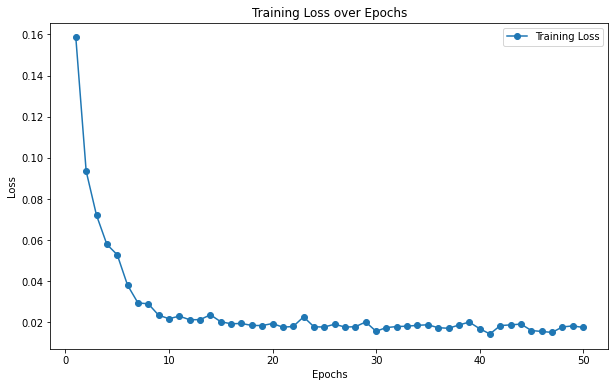

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

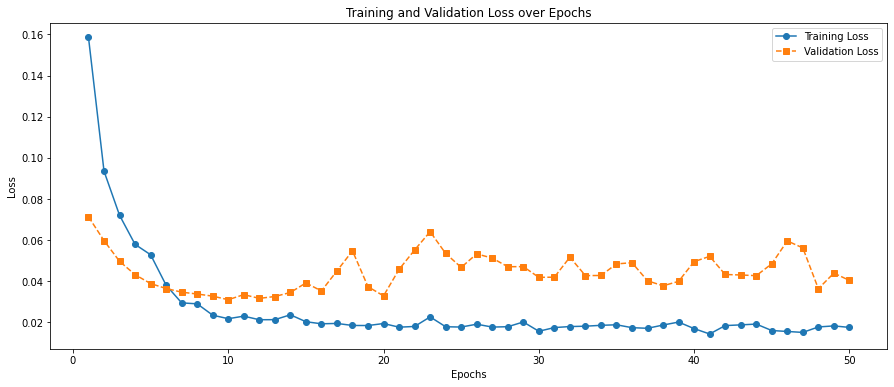

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT12/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.17697824316399727
MAE : 0.16325918243655435


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,255013.250000,236263.303
1,209666.296875,43422.368
2,210157.734375,2161.744
3,202531.265625,944.181
4,233243.375000,13977.643
5,249722.234375,24795.001
6,292752.781250,168828.990
7,324958.156250,461098.498
8,390785.562500,591635.798
9,404051.968750,598360.298


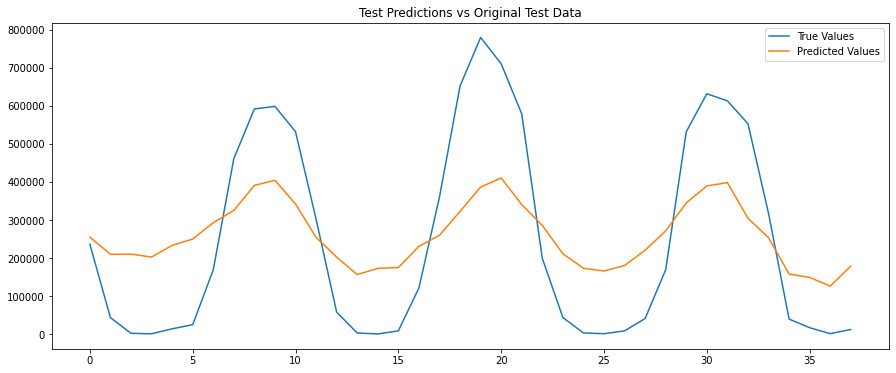

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

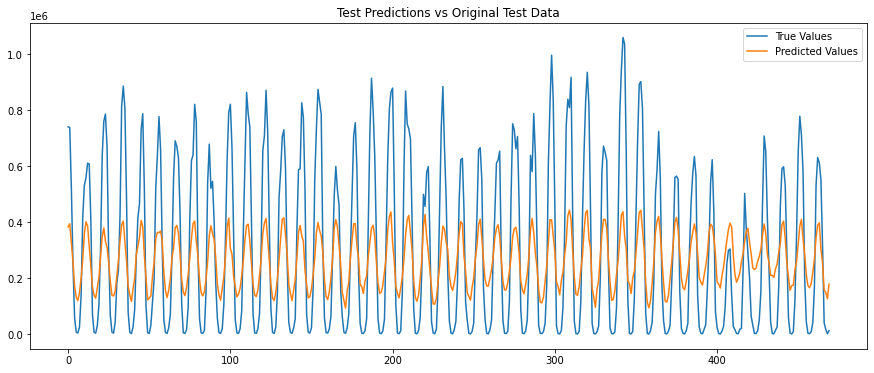

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()